In [1]:
import numpy as np
import pandas as pd

In [2]:
retail=pd.read_csv('OnlineRetail.csv')

In [3]:
retail.columns

Index(['InvoiceNo', 'StockCode', 'Description', 'Quantity', 'InvoiceDate',
       'UnitPrice', 'CustomerID', 'Country'],
      dtype='object')

invoiceNo: 주문 번호
StockCode: 아이템 아이디
Description: 상품 설명
Quantity: 상품 주문 수량
InvoiceDate: 주문 시각
UnitPrice: 상품 가격(동일한 통화)
CustomerID: 고객 아이디
Country: 고객 거주 지역(국가)

In [4]:
retail.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 541909 entries, 0 to 541908
Data columns (total 8 columns):
 #   Column       Non-Null Count   Dtype  
---  ------       --------------   -----  
 0   InvoiceNo    541909 non-null  object 
 1   StockCode    541909 non-null  object 
 2   Description  540455 non-null  object 
 3   Quantity     541909 non-null  int64  
 4   InvoiceDate  541909 non-null  object 
 5   UnitPrice    541909 non-null  float64
 6   CustomerID   406829 non-null  float64
 7   Country      541909 non-null  object 
dtypes: float64(2), int64(1), object(5)
memory usage: 33.1+ MB


In [6]:
retail.isnull().sum()

InvoiceNo           0
StockCode           0
Description      1454
Quantity            0
InvoiceDate         0
UnitPrice           0
CustomerID     135080
Country             0
dtype: int64

In [7]:
retail.head(10)

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,12/1/2010 8:26,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,12/1/2010 8:26,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,12/1/2010 8:26,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,12/1/2010 8:26,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,12/1/2010 8:26,3.39,17850.0,United Kingdom
5,536365,22752,SET 7 BABUSHKA NESTING BOXES,2,12/1/2010 8:26,7.65,17850.0,United Kingdom
6,536365,21730,GLASS STAR FROSTED T-LIGHT HOLDER,6,12/1/2010 8:26,4.25,17850.0,United Kingdom
7,536366,22633,HAND WARMER UNION JACK,6,12/1/2010 8:28,1.85,17850.0,United Kingdom
8,536366,22632,HAND WARMER RED POLKA DOT,6,12/1/2010 8:28,1.85,17850.0,United Kingdom
9,536367,84879,ASSORTED COLOUR BIRD ORNAMENT,32,12/1/2010 8:34,1.69,13047.0,United Kingdom


In [9]:
retail.describe()

,Quantity,UnitPrice,CustomerID
count,541909.000000,541909.000000,406829.000000
mean,9.552250,4.611114,15287.690570
std,218.081158,96.759853,1713.600303
min,-80995.000000,-11062.060000,12346.000000
25%,1.000000,1.250000,13953.000000
50%,3.000000,2.080000,15152.000000
75%,10.000000,4.130000,16791.000000
max,80995.000000,38970.000000,18287.000000


값을 보면 최솟값에 -값이 보인다. 음수 값은 이 데이터 상에서 거의 나올 수 없는 값이기 때문에 과감한 삭제가 필요하다

In [11]:
retail.isnull().sum()

InvoiceNo           0
StockCode           0
Description      1454
Quantity            0
InvoiceDate         0
UnitPrice           0
CustomerID     135080
Country             0
dtype: int64

In [12]:
retail=retail[pd.notnull(retail['CustomerID'])]
len(retail)

406829

음수값 삭제해주기

In [13]:
retail=retail[retail['Quantity']>0]
retail=retail[retail['UnitPrice']>0]
retail
len(retail)

397884

In [14]:
retail.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 397884 entries, 0 to 541908
Data columns (total 8 columns):
 #   Column       Non-Null Count   Dtype  
---  ------       --------------   -----  
 0   InvoiceNo    397884 non-null  object 
 1   StockCode    397884 non-null  object 
 2   Description  397884 non-null  object 
 3   Quantity     397884 non-null  int64  
 4   InvoiceDate  397884 non-null  object 
 5   UnitPrice    397884 non-null  float64
 6   CustomerID   397884 non-null  float64
 7   Country      397884 non-null  object 
dtypes: float64(2), int64(1), object(5)
memory usage: 27.3+ MB


In [15]:
retail['CustomerID']=retail['CustomerID'].astype(np.int32)
retail.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 397884 entries, 0 to 541908
Data columns (total 8 columns):
 #   Column       Non-Null Count   Dtype  
---  ------       --------------   -----  
 0   InvoiceNo    397884 non-null  object 
 1   StockCode    397884 non-null  object 
 2   Description  397884 non-null  object 
 3   Quantity     397884 non-null  int64  
 4   InvoiceDate  397884 non-null  object 
 5   UnitPrice    397884 non-null  float64
 6   CustomerID   397884 non-null  int32  
 7   Country      397884 non-null  object 
dtypes: float64(1), int32(1), int64(1), object(5)
memory usage: 25.8+ MB


문자열로 되어있던 데이터를 숫자형으로 바꾸어주었다.

총 지출 비용 구하기

In [16]:
retail['TotalPrice']=retail['Quantity']*retail['UnitPrice']

In [17]:
retail.head(7)

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,TotalPrice
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,12/1/2010 8:26,2.55,17850,United Kingdom,15.30
1,536365,71053,WHITE METAL LANTERN,6,12/1/2010 8:26,3.39,17850,United Kingdom,20.34
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,12/1/2010 8:26,2.75,17850,United Kingdom,22.00
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,12/1/2010 8:26,3.39,17850,United Kingdom,20.34
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,12/1/2010 8:26,3.39,17850,United Kingdom,20.34
5,536365,22752,SET 7 BABUSHKA NESTING BOXES,2,12/1/2010 8:26,7.65,17850,United Kingdom,15.30
6,536365,21730,GLASS STAR FROSTED T-LIGHT HOLDER,6,12/1/2010 8:26,4.25,17850,United Kingdom,25.50


In [43]:
import numpy as np
import pandas as pd
import seaborn as sns
COLORS=sns.color_palette()

%matplotlib inline

In [19]:
dtypes={
    'UnitPrice':np.float32,
    'CustomerID':np.int32,
    'Quantity':np.int32
}
retail=pd.read_csv('./OnlineRetailClean.csv',dtype=dtypes)
retail.head()

,Unnamed: 0,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,CheckoutPrice
0,0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,12/1/2010 8:26,2.55,17850,United Kingdom,15.30
1,1,536365,71053,WHITE METAL LANTERN,6,12/1/2010 8:26,3.39,17850,United Kingdom,20.34
2,2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,12/1/2010 8:26,2.75,17850,United Kingdom,22.00
3,3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,12/1/2010 8:26,3.39,17850,United Kingdom,20.34
4,4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,12/1/2010 8:26,3.39,17850,United Kingdom,20.34


In [20]:
retail.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 397884 entries, 0 to 397883
Data columns (total 10 columns):
 #   Column         Non-Null Count   Dtype  
---  ------         --------------   -----  
 0   Unnamed: 0     397884 non-null  int64  
 1   InvoiceNo      397884 non-null  int64  
 2   StockCode      397884 non-null  object 
 3   Description    397884 non-null  object 
 4   Quantity       397884 non-null  int32  
 5   InvoiceDate    397884 non-null  object 
 6   UnitPrice      397884 non-null  float32
 7   CustomerID     397884 non-null  int32  
 8   Country        397884 non-null  object 
 9   CheckoutPrice  397884 non-null  float64
dtypes: float32(1), float64(1), int32(2), int64(2), object(4)
memory usage: 25.8+ MB


날짜 타입 데이터 변환
- 문자열로 로딩하는 것보다 date/datetime 타입으로 로딩하는 것이 분석에 용이하다

In [21]:
retail['InvoiceDate']=pd.to_datetime(retail['InvoiceDate'],infer_datetime_format=True)

In [22]:
retail.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 397884 entries, 0 to 397883
Data columns (total 10 columns):
 #   Column         Non-Null Count   Dtype         
---  ------         --------------   -----         
 0   Unnamed: 0     397884 non-null  int64         
 1   InvoiceNo      397884 non-null  int64         
 2   StockCode      397884 non-null  object        
 3   Description    397884 non-null  object        
 4   Quantity       397884 non-null  int32         
 5   InvoiceDate    397884 non-null  datetime64[ns]
 6   UnitPrice      397884 non-null  float32       
 7   CustomerID     397884 non-null  int32         
 8   Country        397884 non-null  object        
 9   CheckoutPrice  397884 non-null  float64       
dtypes: datetime64[ns](1), float32(1), float64(1), int32(2), int64(2), object(3)
memory usage: 25.8+ MB


해당기간 동안의 매출
- 전체 매출
- 국가별 매출
- 월별 매출
- 요일별 매출
- 시간별 매출

전체매출

In [24]:
total_revenue=retail['CheckoutPrice'].sum()
total_revenue

8911407.904

국가별 매출

In [25]:
rev_by_countries=retail.groupby('Country').sum()['CheckoutPrice'].sort_values()
rev_by_countries

Country
Saudi Arabia            1.459200e+02
Bahrain                 5.484000e+02
Czech Republic          8.267400e+02
RSA                     1.002310e+03
Brazil                  1.143600e+03
European Community      1.300250e+03
Lithuania               1.661060e+03
Lebanon                 1.693880e+03
United Arab Emirates    1.902280e+03
Unspecified             2.667070e+03
Malta                   2.725590e+03
USA                     3.580390e+03
Canada                  3.666380e+03
Iceland                 4.310000e+03
Greece                  4.760520e+03
Israel                  7.221690e+03
Poland                  7.334650e+03
Austria                 1.019868e+04
Cyprus                  1.359038e+04
Italy                   1.748324e+04
Denmark                 1.895534e+04
Channel Islands         2.045044e+04
Singapore               2.127929e+04
Finland                 2.254608e+04
Portugal                3.343989e+04
Norway                  3.616544e+04
Japan                   3.7416

[Text(0, 0, 'Saudi Arabia'),
 Text(1, 0, 'Bahrain'),
 Text(2, 0, 'Czech Republic'),
 Text(3, 0, 'RSA'),
 Text(4, 0, 'Brazil'),
 Text(5, 0, 'European Community'),
 Text(6, 0, 'Lithuania'),
 Text(7, 0, 'Lebanon'),
 Text(8, 0, 'United Arab Emirates'),
 Text(9, 0, 'Unspecified'),
 Text(10, 0, 'Malta'),
 Text(11, 0, 'USA'),
 Text(12, 0, 'Canada'),
 Text(13, 0, 'Iceland'),
 Text(14, 0, 'Greece'),
 Text(15, 0, 'Israel'),
 Text(16, 0, 'Poland'),
 Text(17, 0, 'Austria'),
 Text(18, 0, 'Cyprus'),
 Text(19, 0, 'Italy'),
 Text(20, 0, 'Denmark'),
 Text(21, 0, 'Channel Islands'),
 Text(22, 0, 'Singapore'),
 Text(23, 0, 'Finland'),
 Text(24, 0, 'Portugal'),
 Text(25, 0, 'Norway'),
 Text(26, 0, 'Japan'),
 Text(27, 0, 'Sweden'),
 Text(28, 0, 'Belgium'),
 Text(29, 0, 'Switzerland'),
 Text(30, 0, 'Spain'),
 Text(31, 0, 'Australia'),
 Text(32, 0, 'France'),
 Text(33, 0, 'Germany'),
 Text(34, 0, 'EIRE'),
 Text(35, 0, 'Netherlands'),
 Text(36, 0, 'United Kingdom')]

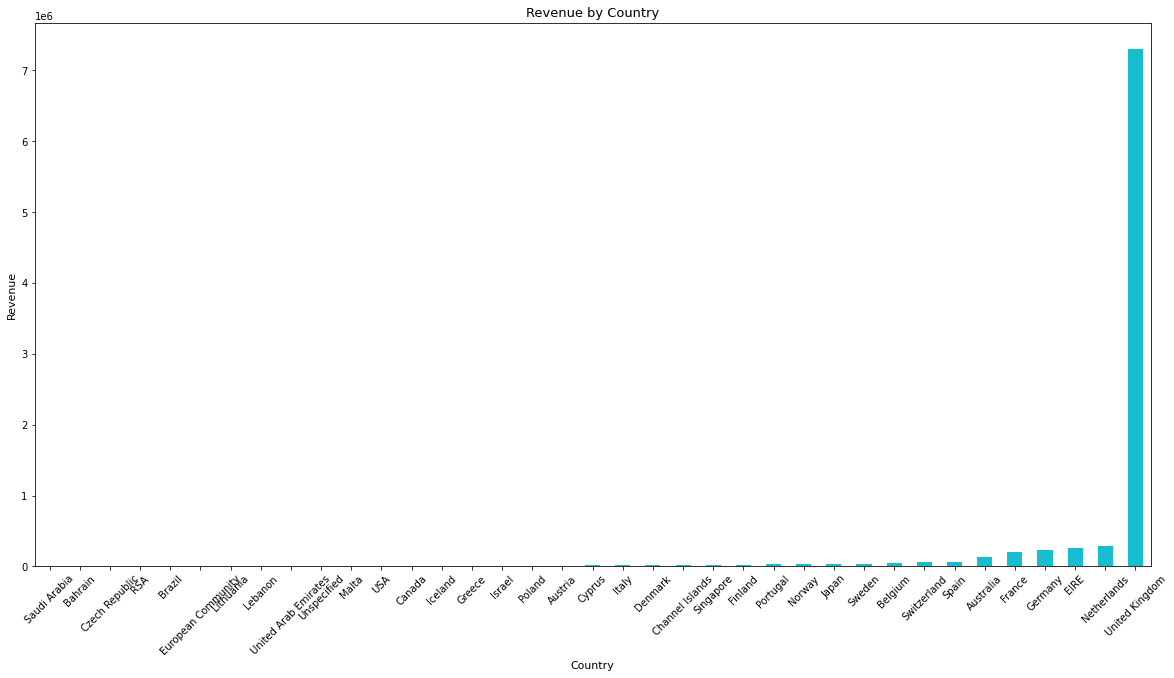

In [28]:
plot=rev_by_countries.plot(kind='bar',color=COLORS[-1],figsize=[20,10])
plot.set_xlabel('Country',fontsize=11)
plot.set_ylabel('Revenue',fontsize=11)
plot.set_title('Revenue by Country',fontsize=13)
plot.set_xticklabels(rev_by_countries.index,rotation=45)

In [29]:
#매출비율
rev_by_countries/total_revenue

Country
Saudi Arabia            0.000016
Bahrain                 0.000062
Czech Republic          0.000093
RSA                     0.000112
Brazil                  0.000128
European Community      0.000146
Lithuania               0.000186
Lebanon                 0.000190
United Arab Emirates    0.000213
Unspecified             0.000299
Malta                   0.000306
USA                     0.000402
Canada                  0.000411
Iceland                 0.000484
Greece                  0.000534
Israel                  0.000810
Poland                  0.000823
Austria                 0.001144
Cyprus                  0.001525
Italy                   0.001962
Denmark                 0.002127
Channel Islands         0.002295
Singapore               0.002388
Finland                 0.002530
Portugal                0.003752
Norway                  0.004058
Japan                   0.004199
Sweden                  0.004307
Belgium                 0.004623
Switzerland             0.006334
Sp

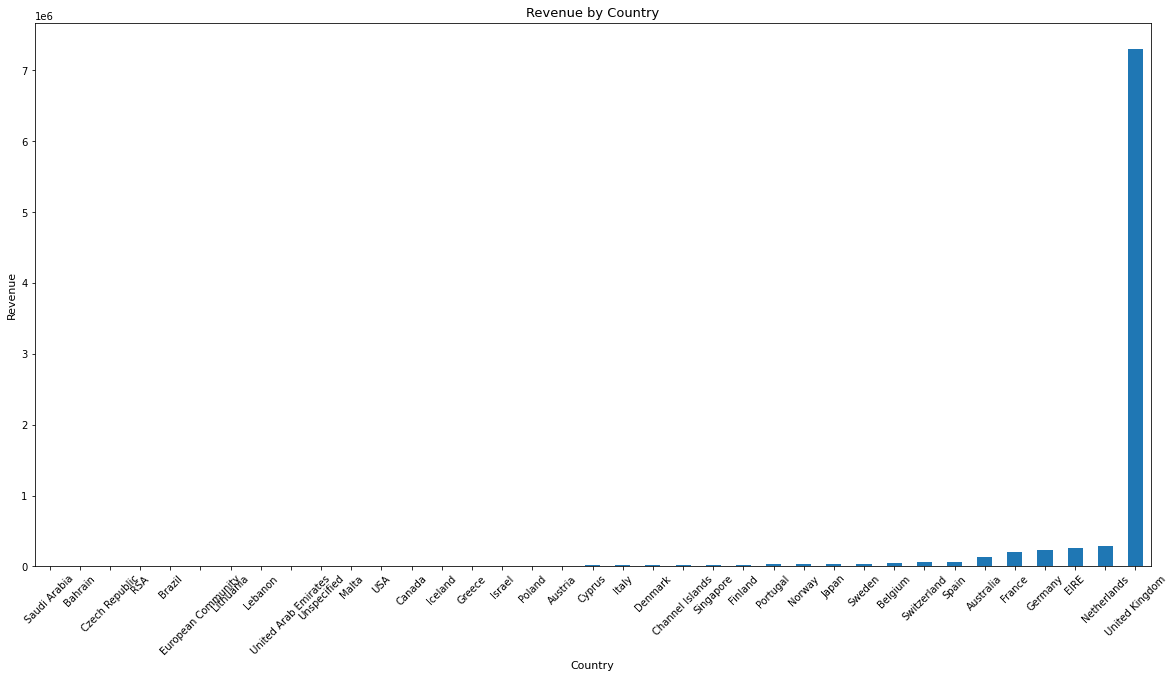

In [31]:
def plot_bar(df,xlabel,ylabel,title,color=COLORS[0],figsize=(20,10),rotation=45):
    plot=df.plot(kind='bar',color=color,figsize=figsize)
    plot.set_xlabel(xlabel,fontsize=11)
    plot.set_ylabel(ylabel,fontsize=11)
    plot.set_title(title,fontsize=13)
    plot.set_xticklabels(labels=df.index,rotation=rotation)
    
plot_bar(rev_by_countries,'Country','Revenue','Revenue by Country')

In [33]:
def extract_month(date):
    month=str(date.month)
    if date.month<10:
        month='0'+month
    return str(date.year)+month

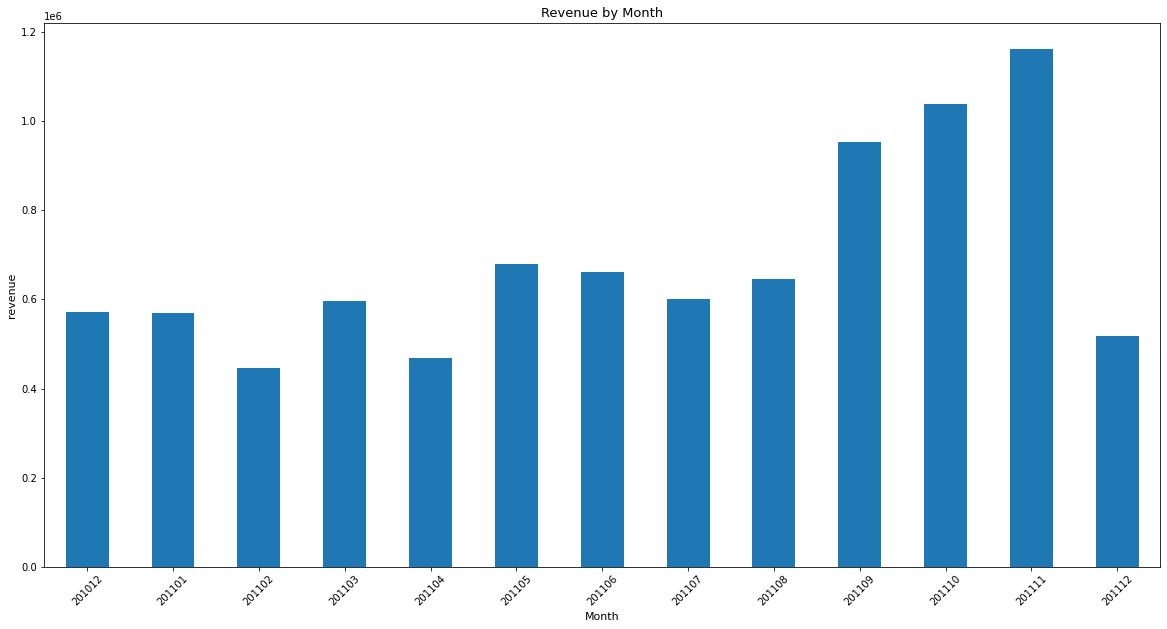

In [36]:
rev_by_month=retail.set_index('InvoiceDate').groupby(extract_month).sum()['CheckoutPrice']
plot_bar(rev_by_month,'Month','revenue','Revenue by Month')

In [48]:
rev_by_dow=retail.set_index('InvoiceDate').groupby(lambda date:date.dayofweek).sum()['CheckoutPrice']
rev_by_dow

0    1367146.411
1    1700634.631
2    1588336.170
3    1976859.070
4    1485917.401
6     792514.221
Name: CheckoutPrice, dtype: float64

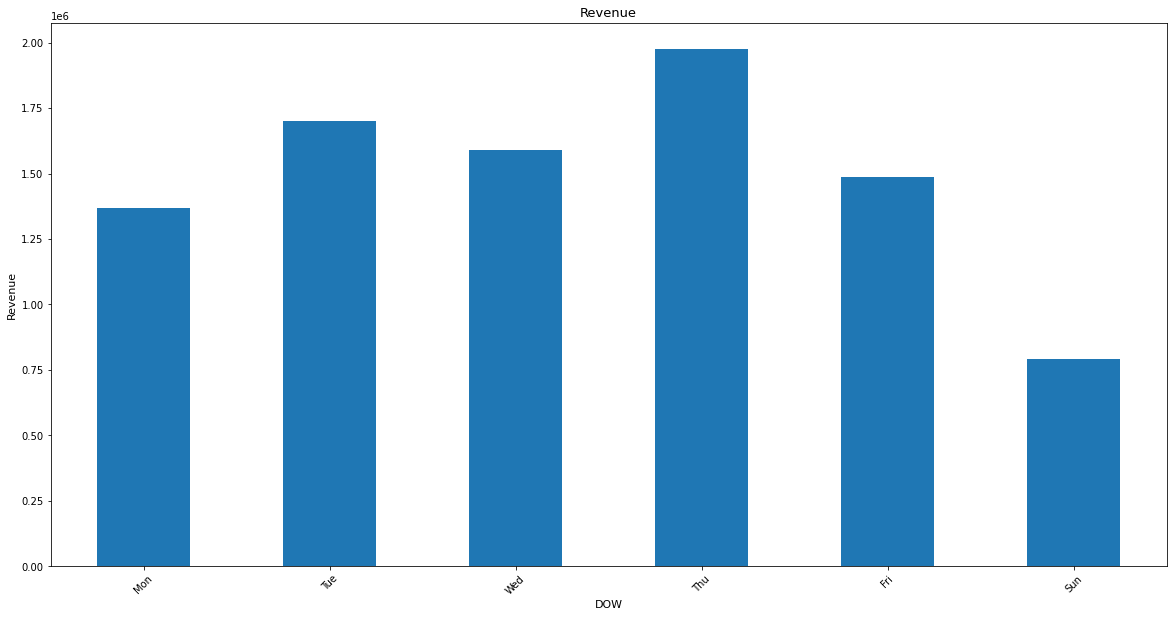

In [49]:
DAY_OF_WEEK=np.array(['Mon','Tue','Wed','Thu','Fri','Sat','Sun'])#꼭 np.array
rev_by_dow.index=DAY_OF_WEEK[rev_by_dow.index]

plot_bar(rev_by_dow,'DOW','Revenue','Revenue')